_Aprendizaje Automático_


# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

### Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
#Imputación de datos
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
#Lineal regresion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Decision Tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
#
import warnings
warnings.filterwarnings("ignore")

In [2]:
## cargar el dataset

In [3]:
#from pandas.conftest import skipna

# Carga el dataset desde un archivo CSV
df = pd.read_excel('..\Downloads\AirQualityUCI.xlsx')
df


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


### ¿cuántas instancias tiene el dataset?

In [4]:
instancias = len(df)
print(f'El dataset tiene {instancias} instancias')

El dataset tiene 9357 instancias


## ¿cuál es el tipo de datos de cada una de las columnas?

In [5]:
tipos = df.dtypes
print("El tipo de datos de acuerdo a cada fila, se mira a continuacion:\n",tipos)

El tipo de datos de acuerdo a cada fila, se mira a continuacion:
 Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

In [6]:
col_categoricas = sum(tipos == 'object') + sum(tipos == 'category')
col_continuas = sum(tipos == 'float64') + sum(tipos == 'int64')
print(f'El dataset tiene {col_categoricas} columnas categoricas')
print(f'El dataset tiene {col_continuas} columnas continuas')

El dataset tiene 1 columnas categoricas
El dataset tiene 13 columnas continuas


## ¿existen valores nulos en el dataset?

In [7]:
val_nulos = df.isnull().values.any()
print(f'Existen valores nulos: {val_nulos}')

Existen valores nulos: False


## ¿cuál es la variable respuesta?¿de qué tipo es?

In [8]:
var_respuesta = df['CO(GT)']
print(f'Variable Respuesta: {var_respuesta.name}\nTipo: {var_respuesta.dtype}')

Variable Respuesta: CO(GT)
Tipo: float64


## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

In [9]:
col_interes = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
distribucion = df[col_interes].describe()
print(f'La distribucion de los valores es:\n{distribucion}')

La distribucion de los valores es:
            CO(GT)      NOx(GT)      NO2(GT)
count  9357.000000  9357.000000  9357.000000
mean    -34.207524   168.604200    58.135898
std      77.657170   257.424561   126.931428
min    -200.000000  -200.000000  -200.000000
25%       0.600000    50.000000    53.000000
50%       1.500000   141.000000    96.000000
75%       2.600000   284.200000   133.000000
max      11.900000  1479.000000   339.700000


¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

- **Distribución especial:** CO(GT) muestra una media negativa (-34.20). Esto es anormal, comparándolo con las medias de las demás variables. Además, existe una alta diferencia entre la media y la mediana de las tres variables. Esto indica una *distribución sesgada*, no simétrica.
- **Datos Faltantes:** En las 3 variables de estudio se muestran mínimos de -200 que son valores no reales. Esto indica que existen errores en los valores o datos nulos (faltantes) que han sido codificados como -200.
- **Datos anómalos:** Los valores máximos de las variables son muy altos comparándolos con la media. Esto indica que puede haber outlier (valores anómalos).


## ¿cómo son las correlaciones entre las variables del dataset?

In [10]:
correlacion_matriz = df.corr(numeric_only=True)
print(f'Las correlaciones entres las variables se pueden ver a continuacion:\n{correlacion_matriz}')

Las correlaciones entres las variables se pueden ver a continuacion:
                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041415  0.128351 -0.031377       0.029939   
PT08.S1(CO)    0.041415     1.000000  0.170009  0.852659       0.933101   
NMHC(GT)       0.128351     0.170009  1.000000  0.037329       0.110097   
C6H6(GT)      -0.031377     0.852659  0.037329  1.000000       0.767401   
PT08.S2(NMHC)  0.029939     0.933101  0.110097  0.767401       1.000000   
NOx(GT)        0.526450     0.278029 -0.004413 -0.001163       0.331331   
PT08.S3(NOx)  -0.089981     0.086931  0.048832  0.512154      -0.073748   
NO2(GT)        0.671140     0.154058  0.103345 -0.010971       0.176569   
PT08.S4(NO2)  -0.073721     0.845133  0.162689  0.774649       0.874761   
PT08.S5(O3)    0.080316     0.892436  0.101189  0.641306       0.909909   
T             -0.068952     0.754806 -0.000008  0.971370       0.668984   
RH            -0.048231     0.7

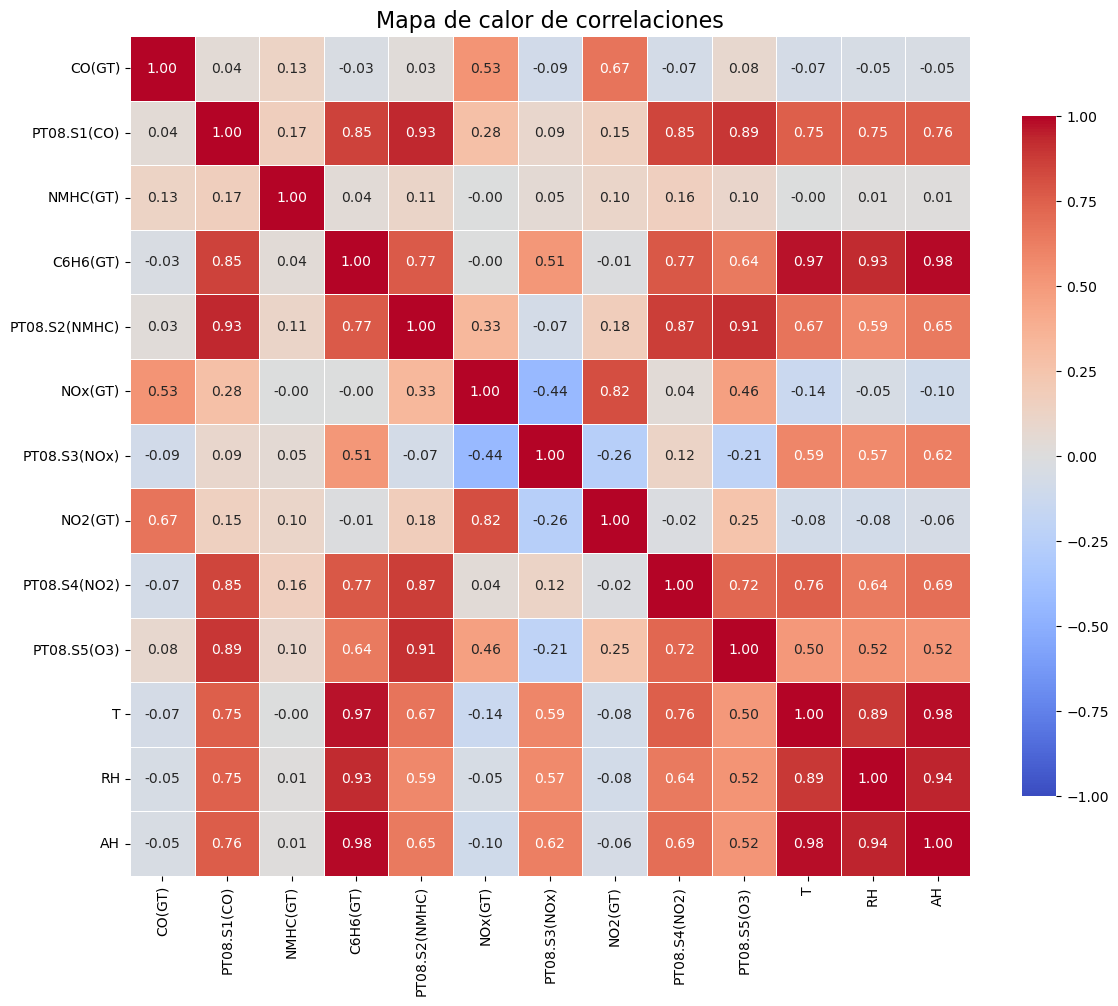

In [11]:
#Matriz de correlación

# Configurar tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(correlacion_matriz,
            annot=True,           # Mostrar los valores numéricos
            fmt=".2f",            # Formato de los números
            cmap="coolwarm",      # Paleta de colores
            vmin=-1, vmax=1,      # Rango de valores de correlación
            square=True,          # Cuadrado por celda
            linewidths=0.5,       # Separación entre celdas
            cbar_kws={"shrink": 0.8})  # Tamaño de la barra de colores

# Título opcional
plt.title("Mapa de calor de correlaciones", fontsize=16)
plt.tight_layout()
plt.show()

##### Se realizó un mapa de calor que permita facilitar la visualización de las correlaciones que existen entre las varables continuas del dataset procesado.


_indica aquí tu respuesta_

## ¿qué tres variables son las más correlacionadas con la variable objetivo?

Las 3 variables mas correlacionadas con la variable objetivo son:
NO2(GT)     0.671140
NOx(GT)     0.526450
NMHC(GT)    0.128351
Name: CO(GT), dtype: float64


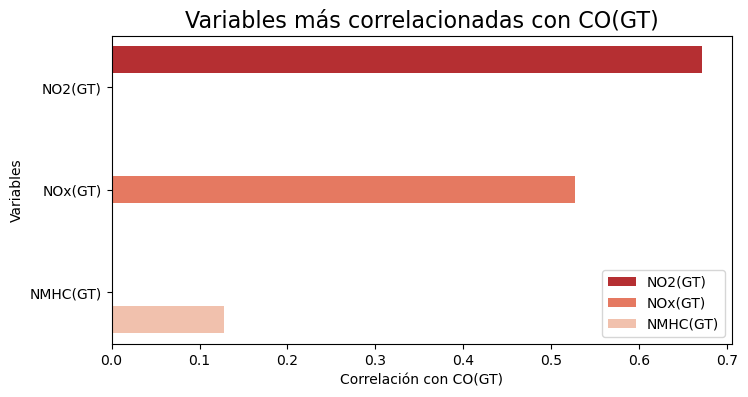

In [12]:
corr_with_CO = correlacion_matriz['CO(GT)'].drop('CO(GT)')
var_corr_3 = corr_with_CO.abs().sort_values(ascending=False).head(3)
print(f'Las 3 variables mas correlacionadas con la variable objetivo son:\n{var_corr_3}')

# Grafico de barras
plt.figure(figsize=(8, 4))
sns.barplot(
    x=var_corr_3.values,
    y=var_corr_3.index,
    palette='Reds_r',
    hue=var_corr_3.index
)

# Etiquetas
plt.title("Variables más correlacionadas con CO(GT)", fontsize=16)
plt.xlabel('Correlación con CO(GT)')
plt.ylabel('Variables')
plt.show()

## ¿existe alguna variable que no tenga correlación?

In [13]:
correlacion_matriz_abs = correlacion_matriz.abs() # Cambio solo a valores positivos la matriz
np.fill_diagonal(correlacion_matriz_abs.values, np.nan) # Lleno los valores de la diagonal con valores nulos
no_correlacion = correlacion_matriz_abs.columns[(correlacion_matriz_abs < 1).all(skipna = True)] # Saco los nombres de las columnas cuando su correlacion es menor a 0.1
print(f'Las variables no correlacionadas son:\n{no_correlacion}')

Las variables no correlacionadas son:
Index([], dtype='object')


## Gráfico de gases vs tiempo


In [14]:
#Dataset que solo incluye las variables 'CO(GT)', 'NOx(GT)', 'NO2(GT)'
var = df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']]

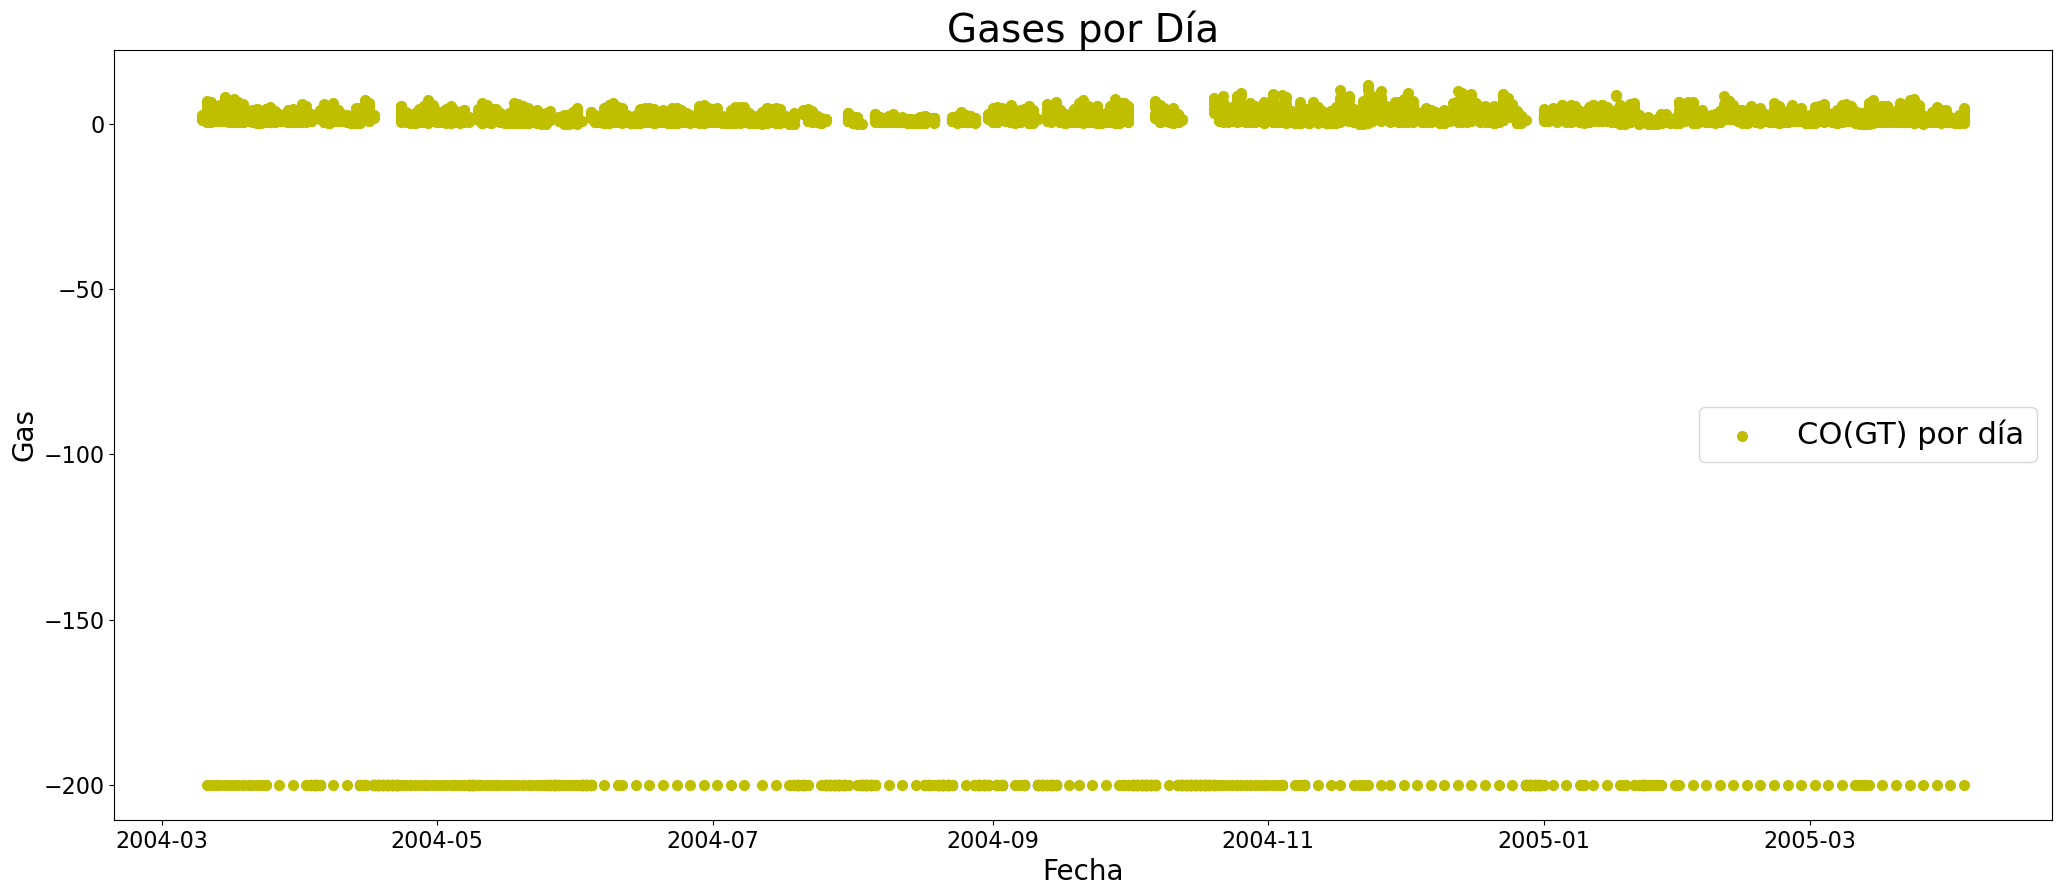

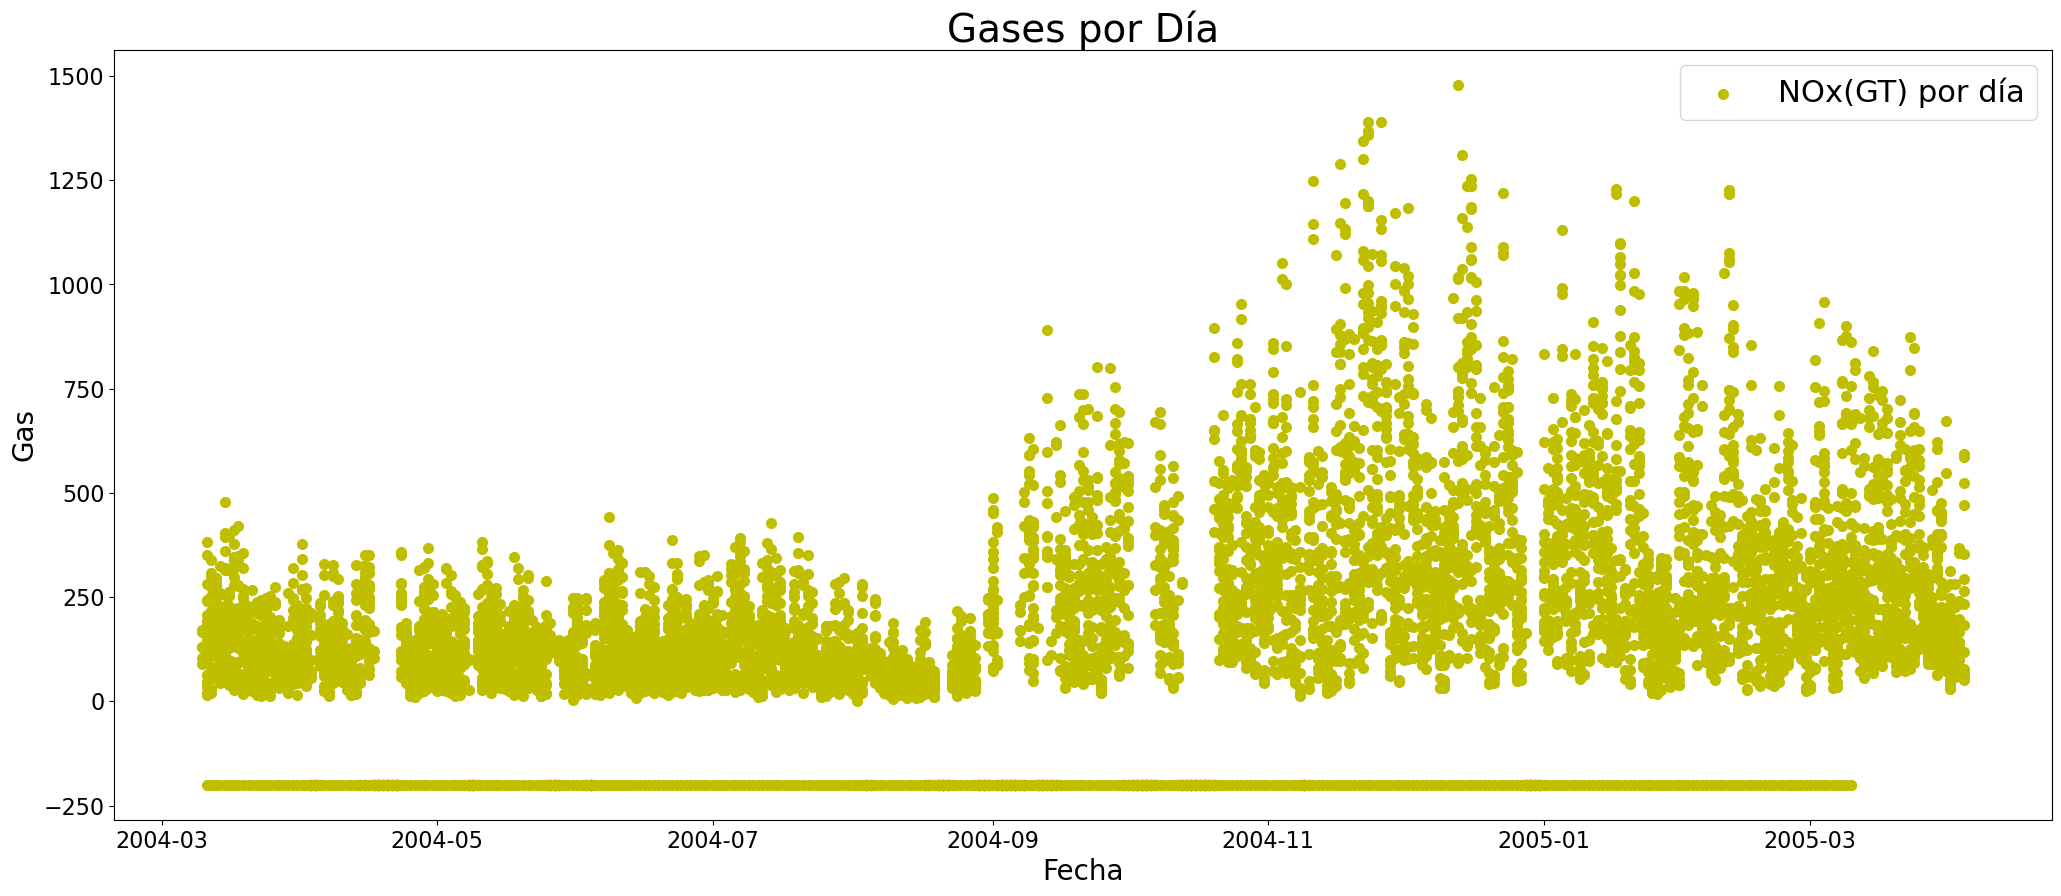

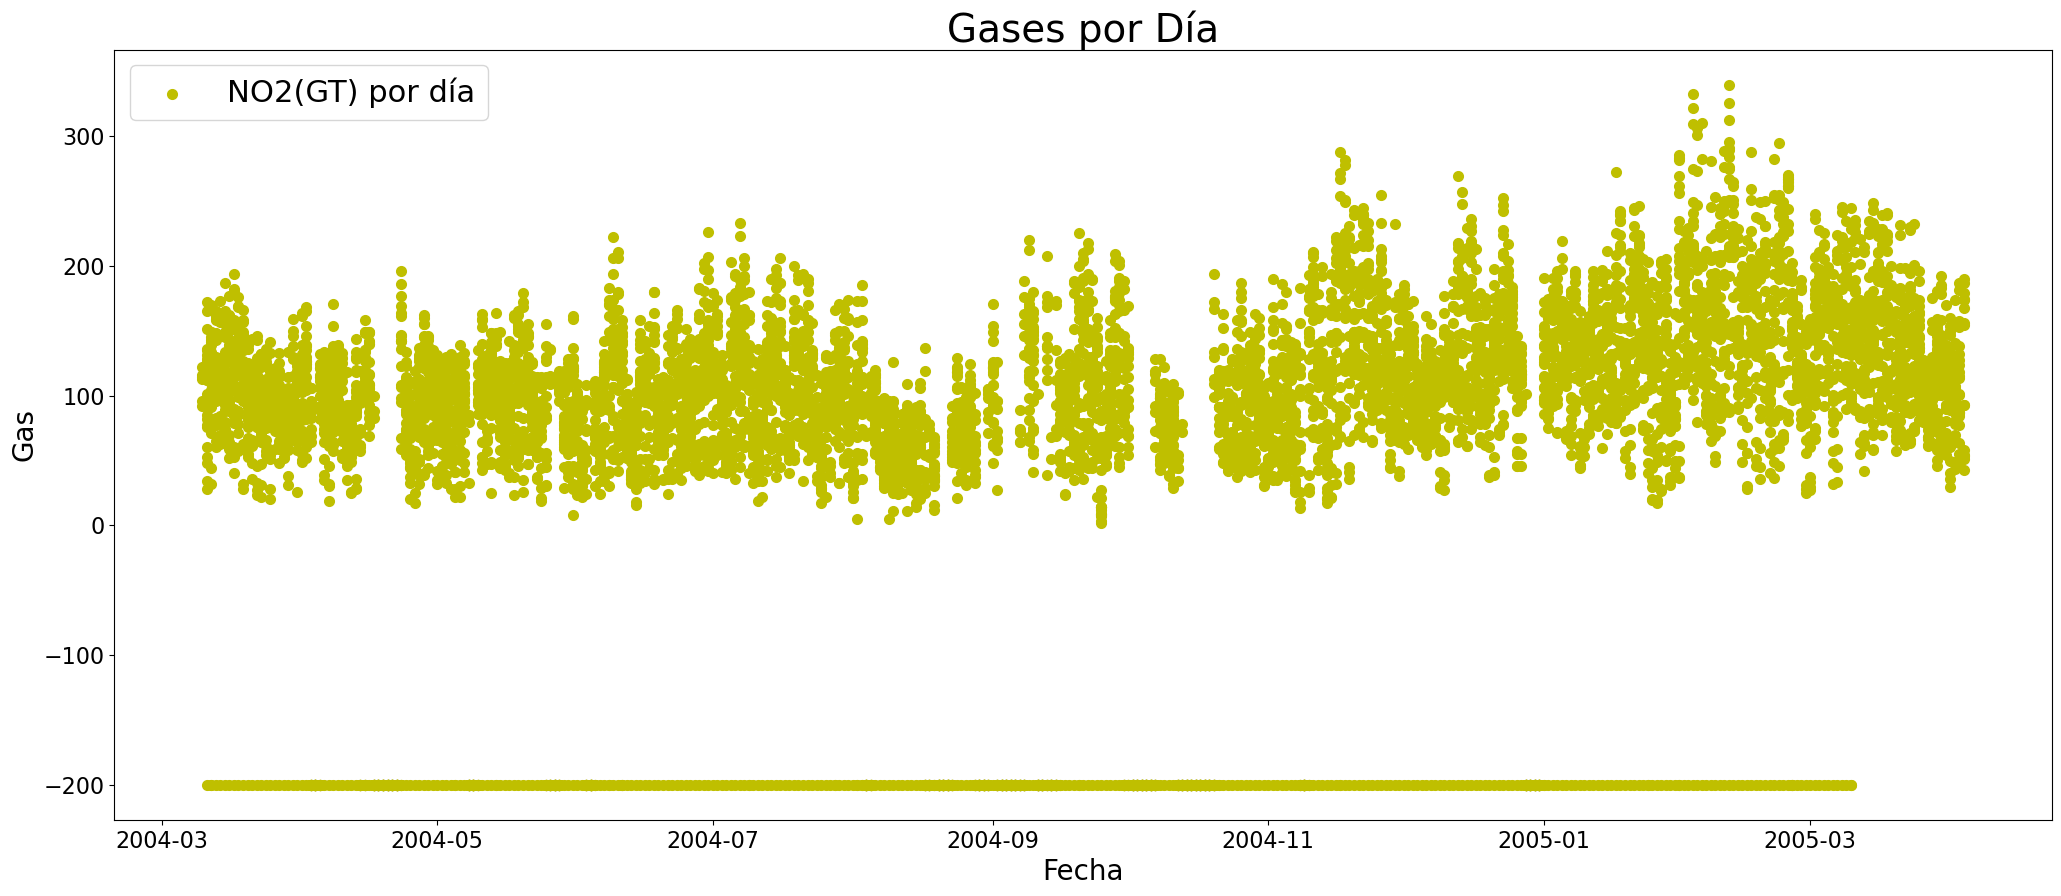

In [15]:
#Gráfico de la producción diaria de gases 'CO(GT)', 'NOx(GT)', 'NO2(GT)'
for i in var:
    plt.figure(figsize=(25, 10))
    plt.scatter(df['Date'], var[i], label=f'{i} por día', linewidth=2, color= "y")
    plt.xlabel('Fecha', fontsize= 20)
    plt.ylabel('Gas', fontsize = 20)
    plt.title(f'Gases por Día', fontsize= 28)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize= 22)
    plt.show()


En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

## Suposiciones sobre los datos
1. **Presencia de valores extremos (outliers):**
- Algunas variables como CO(GT), NOx(GT) y NO2(GT) tienen valores mínimos de -200, lo que indica posibles valores faltantes codificados como valores numéricos, o errores de medición.

2. **Asimetría y dispersión notable:**
- La media y mediana de algunas variables están muy separadas (por ejemplo, NO2(GT)), lo que sugiere distribuciones sesgadas.
- La desviación estándar es alta en proporción al valor medio, indicando variabilidad significativa.

3. **Multicolinealidad moderada a alta:**
Se observan correlaciones fuertes (mayores a 0.85) entre varias variables, por ejemplo:
- C6H6(GT) con AH (0.98), T (0.97), y RH (0.92).
- PT08.S1(CO) con PT08.S2(NMHC) (0.93) y PT08.S5(O3) (0.89).
Esto sugiere redundancia de información entre algunas variables.

## Conclusiones para implementar el modelo predictivo
1. **Preprocesamiento necesario:**
- Tratar valores anómalos (-200): Considerar imputación o eliminación, ya que distorsionan las estadísticas.
- Estandarización o normalización: Debido a la escala y dispersión diferente entre variables.

2. **Reducción de dimensionalidad (si aplica):**
- Puede ser útil eliminar o combinar variables altamente correlacionadas para evitar multicolinealidad y sobreajuste.
- Métodos como PCA (Análisis de componentes principales) para tener menos columnas, manteniendo la información. También podría ser selección de características pueden ser útiles.

3. **Modelo robusto ante relaciones no lineales:**
- Dado que hay variables correlacionadas entre sí, pero no de forma lineal con la variable objetivo, modelos como Random Forest, Gradient Boosting o XGBoost podrían captar mejor estas interacciones.

4. **Evaluación cuidadosa:**
- Validar el modelo con técnicas de validación cruzada.
- Usar métricas apropiadas según el tipo de problema (regresión o clasificación).

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [16]:
#Eliminar valores negativos
# Seleccionar solo las columnas numéricas
numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Reemplazar los valores negativos por NaN
df.loc[:, numericas] = df.loc[:, numericas].mask(df[numericas] < 0, np.nan)

In [17]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [18]:
#Imputación de datos nulos
imputer = KNNImputer(n_neighbors=2) #K nearest neighbor imputer
df_i= pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_i
# Contar valores negativos por cada columna
valores_negativos = (df_i < 0).sum()
print(valores_negativos)
#Escalamiento de datos
df1=df_i.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler() #solo trabaja del intervalo de 0-1
df_sc = pd.DataFrame(scaler.fit_transform(df1), columns=df.drop(columns=["Date", "Time"]).columns)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


In [19]:
df_sc["Año"]=df["Date"].dt.year
df_sc["Mes"]=df["Date"].dt.month
df_sc["Dia"]=df["Date"].dt.day
df_sc["Hora"]=pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df_sc

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Año,Mes,Dia,Hora
0,0.211864,0.511849,0.120981,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.304153,0.499057,0.280046,2004,3,10,18
1,0.161017,0.463196,0.088832,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.297419,0.484287,0.264279,2004,3,10,19
2,0.177966,0.542011,0.068528,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.265993,0.563168,0.276374,2004,3,10,20
3,0.177966,0.522980,0.061760,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.245791,0.638906,0.294198,2004,3,10,21
4,0.127119,0.448833,0.037225,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.249158,0.633564,0.295215,2004,3,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.254237,0.478995,0.235618,0.210411,0.392189,0.318009,0.091708,0.556115,0.370166,0.654936,0.489338,0.252357,0.279592,2005,4,4,10
9353,0.194915,0.370018,0.235618,0.176218,0.351632,0.237847,0.119348,0.524726,0.320369,0.455306,0.544893,0.182904,0.257621,2005,4,4,11
9354,0.194915,0.355296,0.235618,0.192248,0.371023,0.197021,0.119136,0.511401,0.310139,0.378408,0.602694,0.115336,0.222820,2005,4,4,12
9355,0.169492,0.255117,0.164552,0.147787,0.315308,0.157414,0.160754,0.455138,0.220324,0.238406,0.634680,0.054997,0.160865,2005,4,4,13


In [20]:
# separar datos de entrenamiento y test

In [21]:
#Separación de la data en 80% para entrenamiento y test - 20% para evaluación final
df_et, df_ef = train_test_split(df_sc, test_size=0.2, random_state=42)
#Asignación de variables independientes y variable dependiente
X = df_et.iloc[:,1:] #usar solo las variables independientes
Y = df_et.iloc[:,0] #usar solo la variable objetivo
#Validación cruzada
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Evaluación final
X_ev = df_ef.iloc[:,1:]
Y_ev = df_ef.iloc[:,0]

In [22]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

**Variable a utilizar**
       
*CO(GT)*

In [23]:
# entrena el modelo con los datos de entrenamiento

In [24]:
# Modelo de regresion lineal
lr = LinearRegression()

# Entrenamiento de modelo
lr.fit(X_train[["NMHC(GT)","NOx(GT)","NO2(GT)","PT08.S5(O3)","Año","Mes","Dia","Hora"]], y_train)
y_pred = lr.predict(X_test[["NMHC(GT)","NOx(GT)","NO2(GT)","PT08.S5(O3)","Año","Mes","Dia","Hora"]])

In [25]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

Explica qué indican estos parámetros

_indica aquí tu respuesta_

*Relación directa con la contaminación*:

- "NOx(GT)", "NO2(GT)" y "NMHC(GT)" son contaminantes que están relacionados directamente con los niveles de CO en el aire, por lo cual es razonable incluirlos para predecir CO(GT).

*Sensores medidores*:

- "PT08.S5(O3)" mide el ozono, un gas que también puede estar relacionado con niveles de CO por procesos de oxidación y reacciones químicas en el ambiente.

*Información temporal*:

- "Año", "Mes", "Dia", "Hora" fueron seleccionados para capturar patrones estacionales, mensuales, diarios y horarios, que influyen en los niveles de contaminación. Por ejemplo, el tráfico vehicular y la actividad industrial varían en función del tiempo.


In [26]:
# realiza las predicciones para el conjunto de datos de test

In [27]:
print(pd.DataFrame(y_pred))

             0
0     0.226628
1     0.047021
2     0.128124
3     0.033119
4     0.174427
...        ...
1492  0.093515
1493  0.154408
1494  0.100233
1495  0.165808
1496  0.360734

[1497 rows x 1 columns]


In [28]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

* Se plantea usar el MSE (Mean Squared Error), el cual penaliza mucho más los errores grandes, lo que permite identificar y aplicar correciones según requiramos. Además al ser una métrica mas sensible MAE, responde mejor a cambios en las variables predictoras. 


In [29]:
# Calcular métricas de evaluación
maerl = mean_absolute_error(y_test, y_pred)
mserl = mean_squared_error(y_test, y_pred)
rmserl = np.sqrt(mserl)
r2rl = r2_score(y_test, y_pred)

metricas_evaluacion = pd.DataFrame({
    'Métrica': ['MAE (Error Absoluto Medio)', 'MSE (Error Cuadrático Medio)', 'RMSE (Raíz del Error Cuadrático Medio)', 'R² (Coeficiente de Determinación)'],
    'Valor': [maerl, mserl, rmserl, r2rl]
})

print(metricas_evaluacion)

                                  Métrica     Valor
0              MAE (Error Absoluto Medio)  0.032036
1            MSE (Error Cuadrático Medio)  0.002149
2  RMSE (Raíz del Error Cuadrático Medio)  0.046362
3       R² (Coeficiente de Determinación)  0.861600


In [30]:
#Evaluación final
y_pred2 = lr.predict(X_ev[["NMHC(GT)","NOx(GT)","NO2(GT)","PT08.S5(O3)","Año","Mes","Dia","Hora"]])

# Calcular métricas de evaluación final
maerl2 = mean_absolute_error(Y_ev, y_pred2)
mserl2 = mean_squared_error(Y_ev, y_pred2)
rmserl2 = np.sqrt(mserl2)
r2rl2 = r2_score(Y_ev, y_pred2)

metricas_evaluacionf = pd.DataFrame({
    'Métrica': ['MAE (Error Absoluto Medio)', 'MSE (Error Cuadrático Medio)', 'RMSE (Raíz del Error Cuadrático Medio)', 'R² (Coeficiente de Determinación)'],
    'Valor': [maerl2, mserl2, rmserl2, r2rl2]
})

print(metricas_evaluacionf)

                                  Métrica     Valor
0              MAE (Error Absoluto Medio)  0.034206
1            MSE (Error Cuadrático Medio)  0.002420
2  RMSE (Raíz del Error Cuadrático Medio)  0.049198
3       R² (Coeficiente de Determinación)  0.843641


In [31]:
# ¿Qué error tiene el modelo? Explícalo.

_indica aquí tu respuesta_

* El error de nuestro modelo de regresión lineal tiene un valor de 0.03, un valor relativamente pequeño, lo que sugiere que en promedio, el modelo establecido no se esta desviando demasiado de los valores reales, como podemos ver en la siguiente comparativa. Mientras mayor sea el valor de esta metrica indicaria que existen algunas predicciones que se desvian mucho.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [32]:
model_full = LinearRegression()
model_full.fit(X_train, y_train)
# Realización de predicciones
y_pred_full = model_full.predict(X_test)

In [33]:
# Métricas de evaluación

mae_full = mean_absolute_error(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
rmse_full = np.sqrt(mse_full)
r2_full = r2_score(y_test, y_pred_full)


# Resultados

resultados_modelo_full = pd.DataFrame({
    'Métrica': ['MAE (Error Absoluto Medio)', 'MSE (Error Cuadrático Medio)', 'RMSE (Raíz del Error Cuadrático Medio)', 'R² (Coeficiente de Determinación)'],
    'Valor': [mae_full, mse_full, rmse_full, r2_full]
})


print(resultados_modelo_full)

                                  Métrica     Valor
0              MAE (Error Absoluto Medio)  0.021571
1            MSE (Error Cuadrático Medio)  0.001131
2  RMSE (Raíz del Error Cuadrático Medio)  0.033627
3       R² (Coeficiente de Determinación)  0.927188


In [34]:
#Evaluación final
y_pred_full2 = model_full.predict(X_ev)

# Métricas de evaluación

mae_full2 = mean_absolute_error(Y_ev, y_pred_full2)
mse_full2 = mean_squared_error(Y_ev, y_pred_full2)
rmse_full2 = np.sqrt(mse_full2)
r2_full2 = r2_score(Y_ev, y_pred_full2)


# Resultados

resultados_modelo_full2 = pd.DataFrame({
    'Métrica': ['MAE (Error Absoluto Medio)', 'MSE (Error Cuadrático Medio)', 'RMSE (Raíz del Error Cuadrático Medio)', 'R² (Coeficiente de Determinación)'],
    'Valor': [mae_full2, mse_full2, rmse_full2, r2_full2]
})


print(resultados_modelo_full2)

                                  Métrica     Valor
0              MAE (Error Absoluto Medio)  0.022558
1            MSE (Error Cuadrático Medio)  0.001242
2  RMSE (Raíz del Error Cuadrático Medio)  0.035244
3       R² (Coeficiente de Determinación)  0.919758


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

* El valor obtenido para nuestra métrica  MSE (Error Cuadrático Medio) es de 0.001, lo que si bien indica que este segundo modelo es mejor, aunque por una diferencia no significativa, de igual manera se puede concluir que las predicciones de este segundo modelo resultaran ser mejor que el primer modelo establecido. 

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegresson necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros


* criterion: Define la métrica que se utiliza para evaluar la calidad de una división en cada nodo.
* splitter: Define la estrategia para elegir el punto de división en cada nodo.
* max_depth: Define la profundidad máxima del árbol. Si no se especifica, los nodos se expanden hasta que todas las hojas sean puras o hasta que contengan menos de min_samples_split.
* min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
* min_samples_leaf:Número mínimo de muestras que debe contener una hoja. Evita que existan nodos muy pequeños.
* max_features: Número máximo de características a considerar al dividir un nodo.


Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

* Especifica el umbral mínimo de disminución de impureza que un nodo debe lograr para ser dividido. Si la reducción en la impureza (impurity) de un nodo al dividirlo es menor que este valor, entonces no se divide. Las utilidades de este modelo pueden ser: evita sobreajuste al impedir divisiones innecesarias, mejora la generalización del modelo y reduce la complejidad del árbol, generando menos nodos.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [35]:
#Modelo 1 - Configuración recomendada del notebook
DT= DecisionTreeRegressor(criterion="poisson",max_depth=10, min_samples_split= 10, min_samples_leaf=2, max_features=None, random_state=42)

In [36]:
DT.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

In [37]:
y_DT = DT.predict(X_test)


In [38]:
y_DT

array([0.18162558, 0.03240279, 0.15254237, ..., 0.09745763, 0.1639192 ,
       0.24364407])

In [39]:
#Modelo 2 - Configuración optimizada
DT2= DecisionTreeRegressor(criterion="poisson",max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features=None, min_impurity_decrease=0.0001, random_state= 42)

In [40]:
DT2.fit(X_train[["NMHC(GT)","NOx(GT)","NO2(GT)","Año","Mes","Dia","Hora"]], y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10,
                      min_impurity_decrease=0.0001, min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

In [41]:
y_DT2 = DT2.predict(X_test[["NMHC(GT)","NOx(GT)","NO2(GT)","Año","Mes","Dia","Hora"]])

Calcula MAE, R2 y RMSLE

In [42]:
#MAE
mae = mean_absolute_error(y_test, y_DT)
mae2 = mean_absolute_error(y_test, y_DT2)
#R2
r2 = r2_score(y_test, y_DT)
r2dt2 = r2_score(y_test, y_DT2)
#RMSLE
rmsle= np.sqrt(mean_squared_log_error(y_test, y_DT))
rmsle2= np.sqrt(mean_squared_log_error(y_test, y_DT2))
#Impresión de los errores DT1
print("Métricas de error - DT1")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"R2 Score: {r2}")
print(f"RMSLE (Root Mean Squared Logarithmic Error): {rmsle}")
#Impresión de los errores DT2
print("Métricas de error - DT2")
print(f"MAE (Mean Absolute Error): {mae2}")
print(f"R2 Score: {r2dt2}")
print(f"RMSLE (Root Mean Squared Logarithmic Error): {rmsle2}")

Métricas de error - DT1
MAE (Mean Absolute Error): 0.0248888303895475
R2 Score: 0.9011230957856634
RMSLE (Root Mean Squared Logarithmic Error): 0.03147894500929192
Métricas de error - DT2
MAE (Mean Absolute Error): 0.035956540532765036
R2 Score: 0.8213605685331593
RMSLE (Root Mean Squared Logarithmic Error): 0.04186784953286251


In [43]:
#Evaluación final DT1 Y DT2
#Prediccion

y_DTev = DT.predict(X_ev)
y_DT2ev = DT2.predict (X_ev[["NMHC(GT)","NOx(GT)","NO2(GT)","Año","Mes","Dia","Hora"]])

#MAE
maef = mean_absolute_error(Y_ev, y_DTev)
maef2 = mean_absolute_error(Y_ev, y_DT2ev)
#R2
r2f = r2_score(Y_ev, y_DTev)
r2f2 = r2_score(Y_ev, y_DT2ev)
#RMSLE
rmslef= np.sqrt(mean_squared_log_error(Y_ev, y_DTev))
rmslef2= np.sqrt(mean_squared_log_error(Y_ev, y_DT2ev))
#Impresión de los errores DT1
print("Métricas de error - DT1 - EVALUACIÓN FINAL")
print(f"MAE (Mean Absolute Error) DT1: {maef}")
print(f"R2 Score DT1: {r2f}")
print(f"RMSLE (Root Mean Squared Logarithmic Error) DT1: {rmslef}")
#Impresión de los errores DT2
print("Métricas de error - DT2 - EVALUACIÓN FINAL")
print(f"MAE (Mean Absolute Error) DT2: {maef2}")
print(f"R2 Score DT2: {r2f2}")
print(f"RMSLE (Root Mean Squared Logarithmic Error) DT2: {rmslef2}")

Métricas de error - DT1 - EVALUACIÓN FINAL
MAE (Mean Absolute Error) DT1: 0.026009209804408746
R2 Score DT1: 0.9037467464343876
RMSLE (Root Mean Squared Logarithmic Error) DT1: 0.03136931372443523
Métricas de error - DT2 - EVALUACIÓN FINAL
MAE (Mean Absolute Error) DT2: 0.03820254962943873
R2 Score DT2: 0.7908565728979371
RMSLE (Root Mean Squared Logarithmic Error) DT2: 0.04435368120596276


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

##### No hay overfitting en ambos modelos de Decision Tree por su r2 de 90.11% y 81.13% respectivamente, de hecho está en un rango muy eficiente de predicción el cual se puede mejorar modificando ciertos hiperparametros en el modelo.

##### Para evitar el overfitting se recomienda no trabajar con valores de r2 cercanos a 1 o 100% además de utilizar datos fuera del entrenamiento y prueba para evaluar el comportamiento real del modelo en otras situaciones.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

* El modelo de Regresión Lineal Multiple es mejor que ambos modelos Decision Tree debido a que tiene un menor MAE y un menor RMSE, lo que indica que sus predicciones están más cerca de los valores reales. Además tiene un r2 del 92.72%, mientras que los modelos de arbol de decisión solo alcanzan el 90%, es decir, entra en el rango de eficiencia para ser un buen modelo predictivo superando el 70% y no se acerca a 100% para evitar el sobreajuste.Todos los modelos fueron sometidos a una evaluación final para verificar las predicciones con datos que no estaban dentro del entrenamineto y el testeo.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

In [44]:
X_test['Fecha'] = pd.to_datetime(dict(year=X_test['Año'], month=X_test['Mes'], day=X_test['Dia'], hour=X_test['Hora']))
d_rls=pd.concat([X_test.reset_index(), pd.DataFrame(y_pred)], axis=1).rename(columns = {0 : "CO"})
d_rlm=pd.concat([X_test.reset_index(), pd.DataFrame(y_pred_full)], axis=1).rename(columns = {0 : "CO"})
d_dt1=pd.concat([X_test.reset_index(), pd.DataFrame(y_DT)], axis=1).rename(columns = {0 : "CO"})
d_dt2=pd.concat([X_test.reset_index(), pd.DataFrame(y_DT2)], axis=1).rename(columns = {0 : "CO"})
d_real=pd.concat([X_test.reset_index(), pd.DataFrame(y_test)], axis=1)

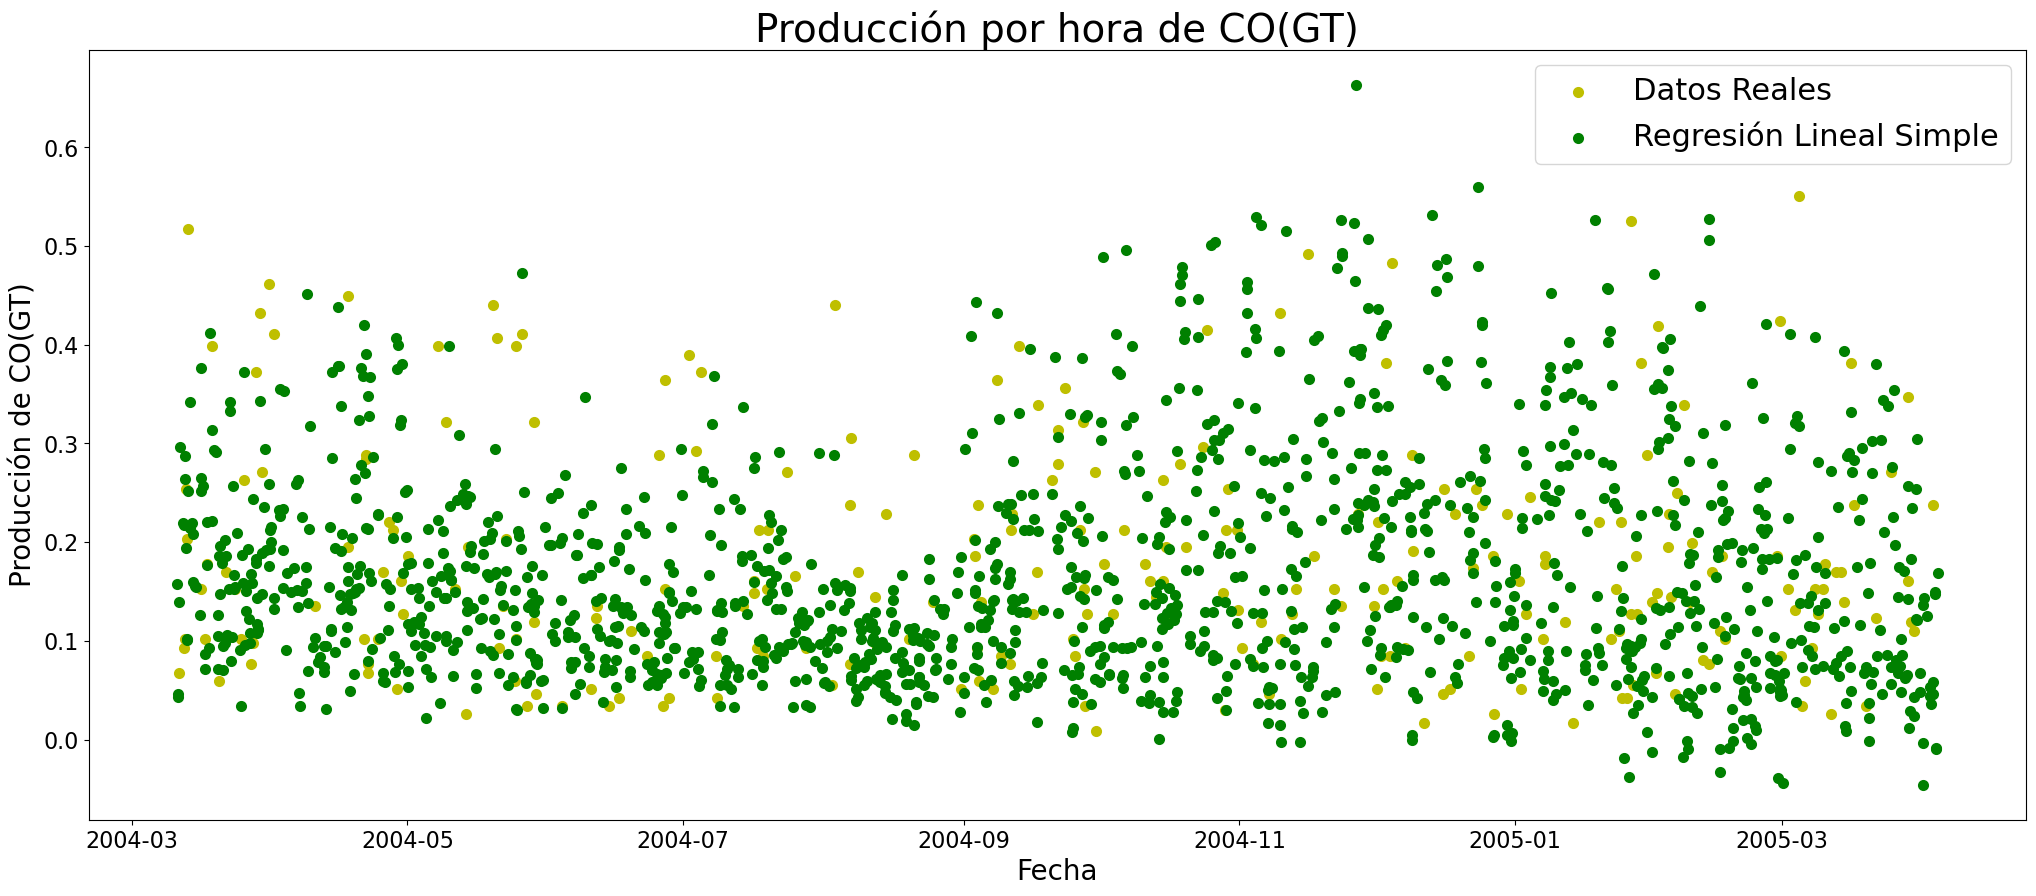

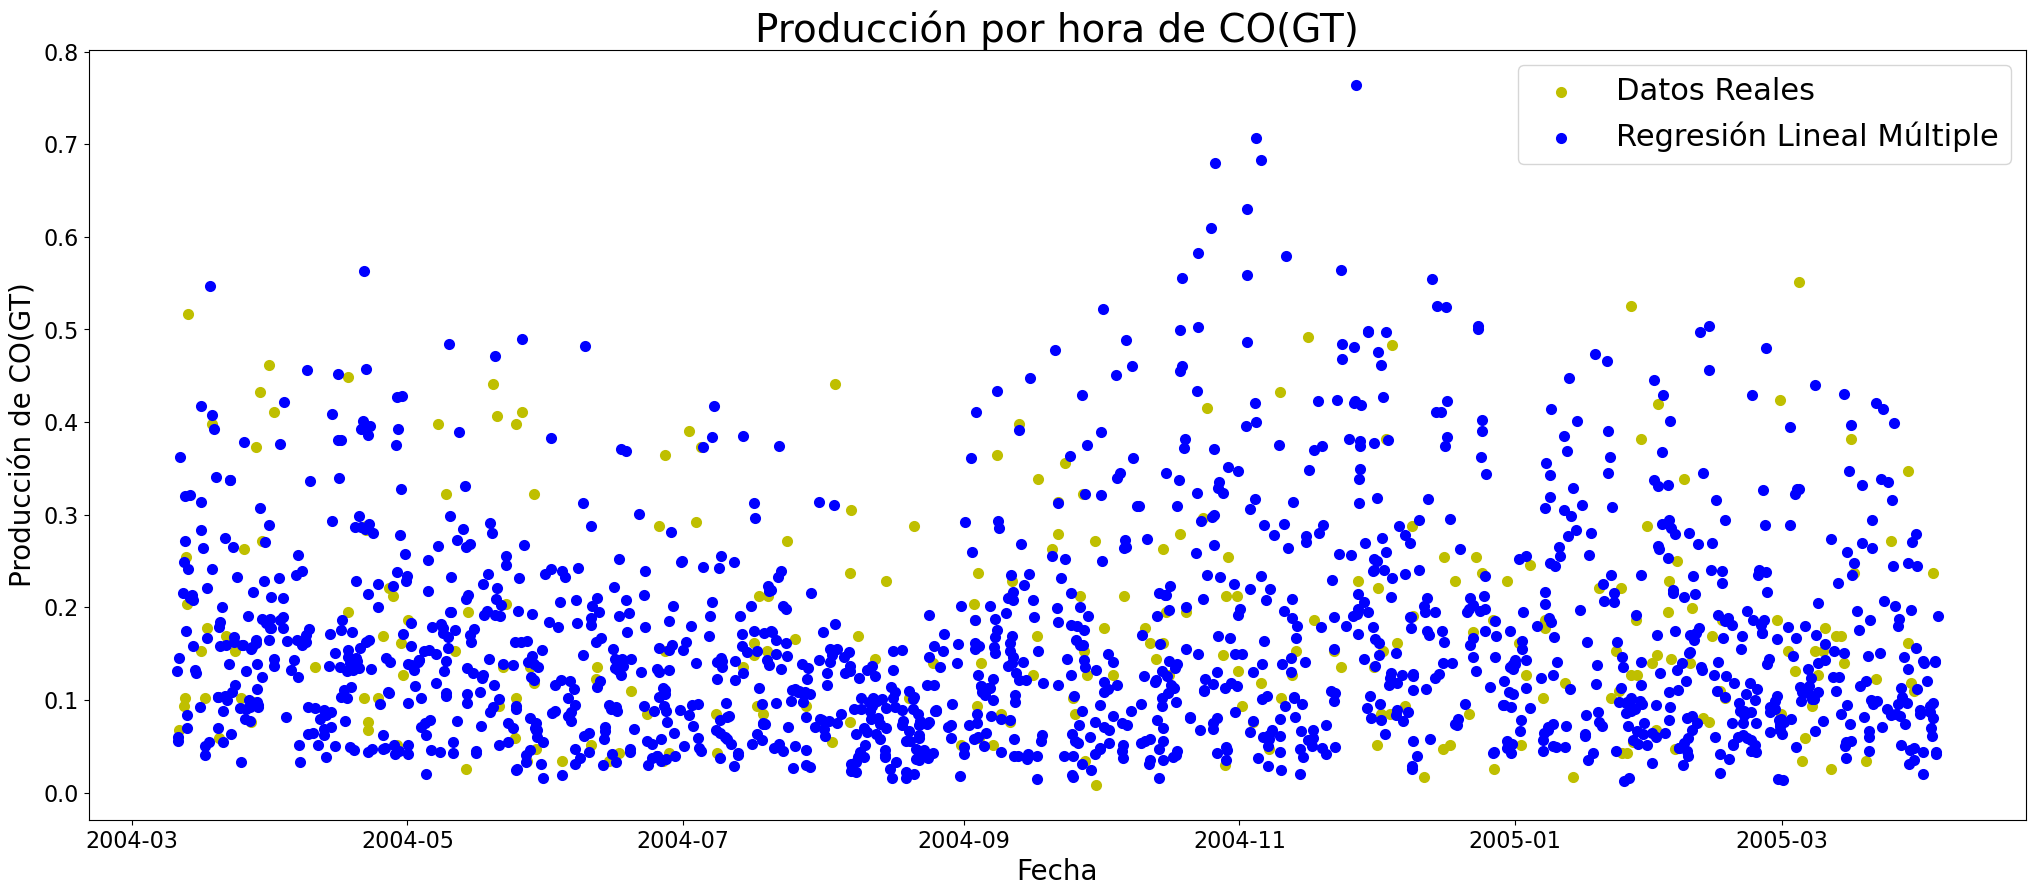

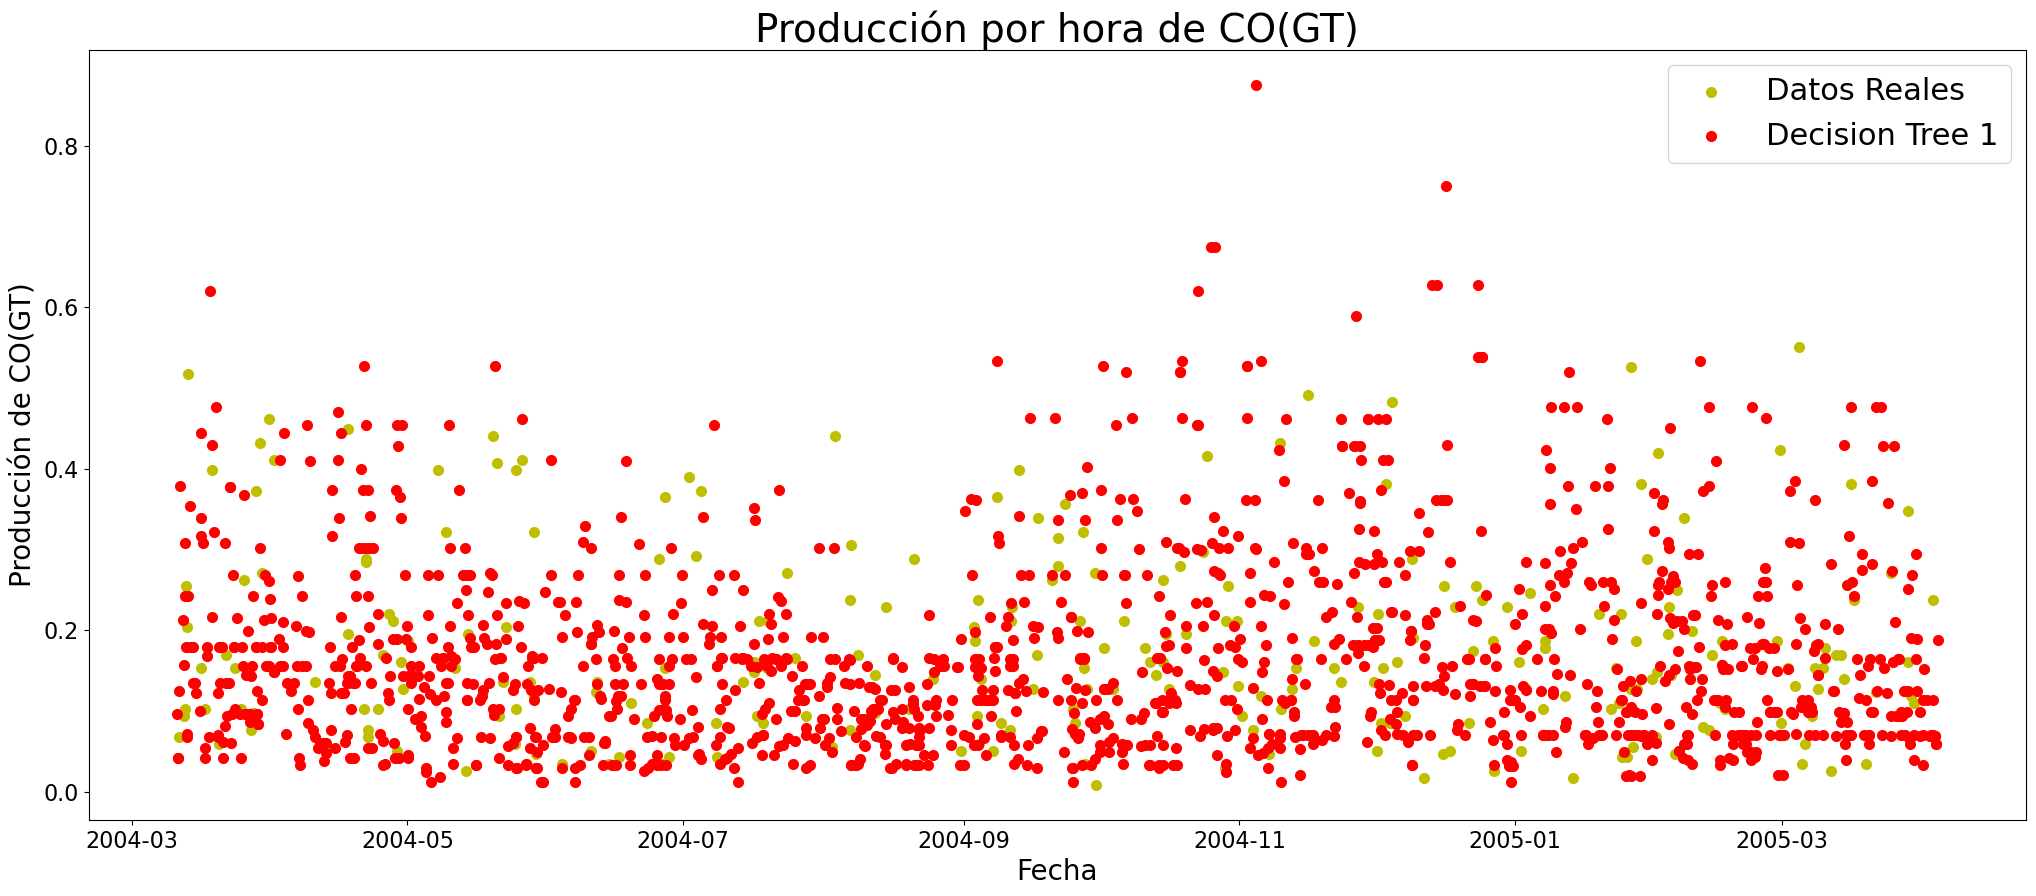

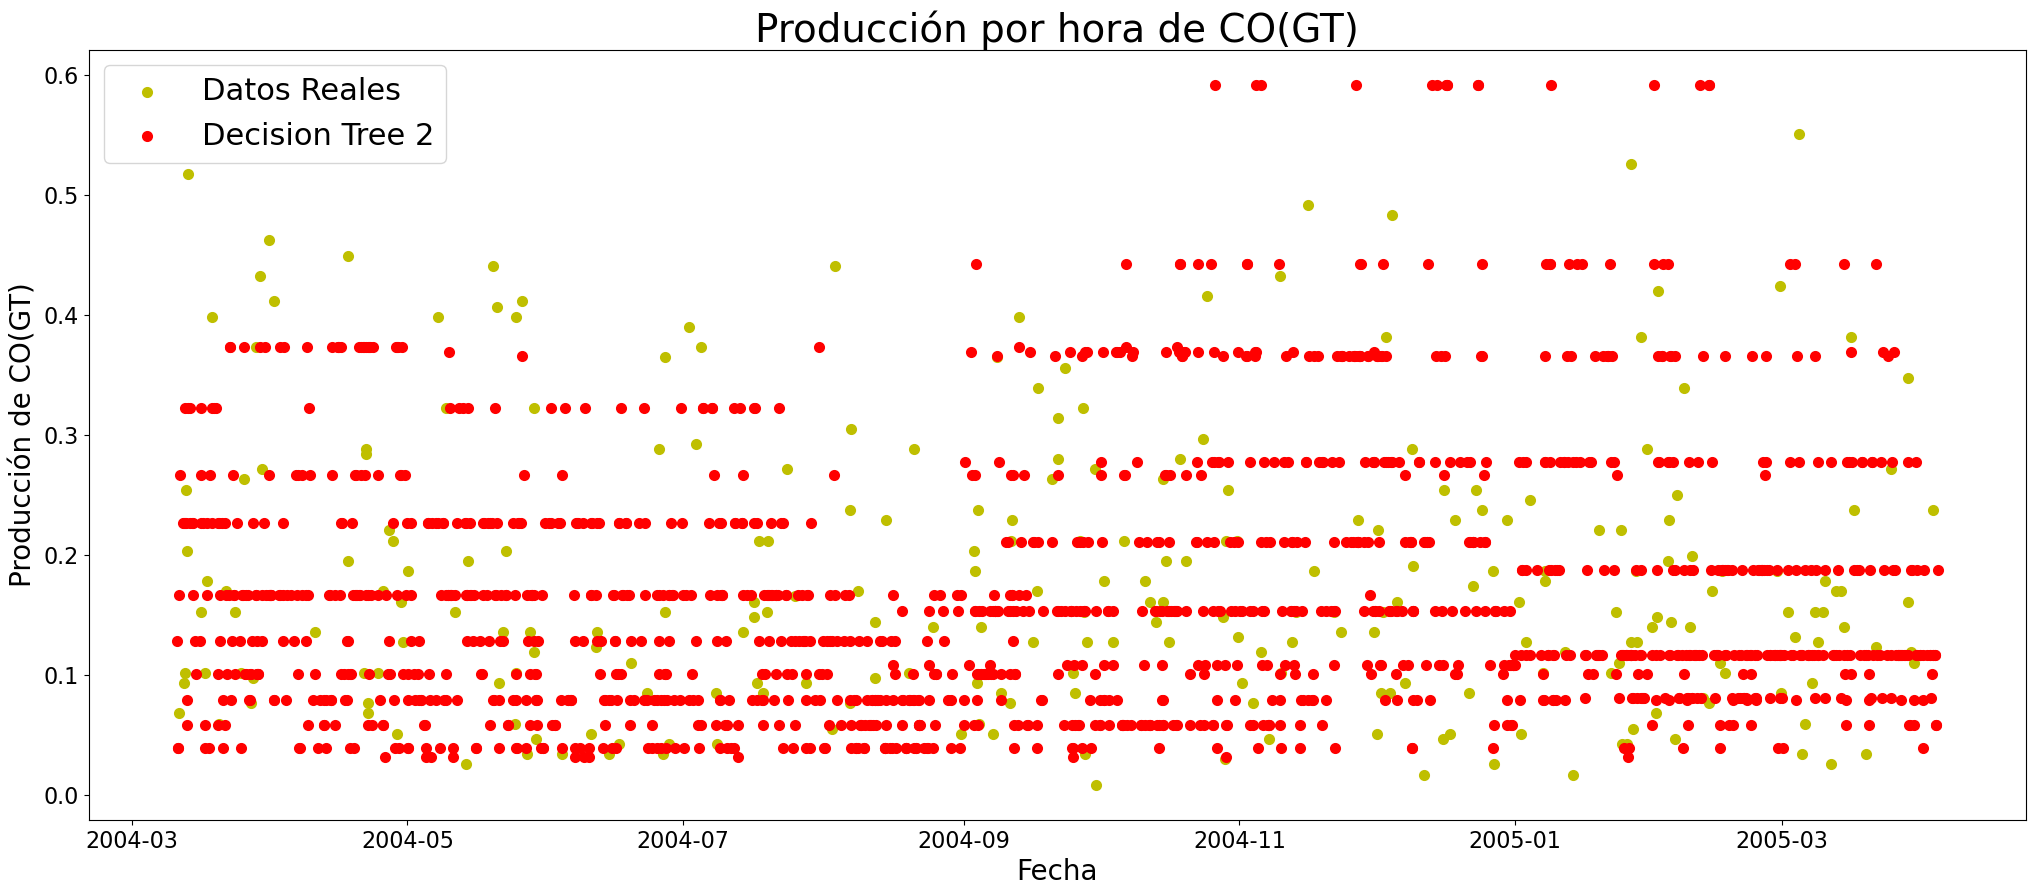

In [45]:
#Comparativa de modelos de Regresión -Validación Cruzada
#Regresión Lineal Simple
plt.figure(figsize=(25, 10))
plt.scatter(d_real['Fecha'], d_real['CO(GT)'], label=f'Datos Reales', linewidth=2, color= "y")
plt.scatter(d_rls['Fecha'], d_rls["CO"], label=f'Regresión Lineal Simple', linewidth=2, color= "g")
plt.xlabel('Fecha', fontsize= 20)
plt.ylabel('Producción de CO(GT)', fontsize = 20)
plt.title(f'Producción por hora de CO(GT)', fontsize= 28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize= 22)
plt.show()
#Regresión Lineal Múltiple
plt.figure(figsize=(25, 10))
plt.scatter(d_real['Fecha'], d_real['CO(GT)'], label=f'Datos Reales', linewidth=2, color= "y")
plt.scatter(d_rlm['Fecha'], d_rlm["CO"], label=f'Regresión Lineal Múltiple', linewidth=2, color= "b")
plt.xlabel('Fecha', fontsize= 20)
plt.ylabel('Producción de CO(GT)', fontsize = 20)
plt.title(f'Producción por hora de CO(GT)', fontsize= 28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize= 22)
plt.show()
#Decision Tree 1
plt.figure(figsize=(25, 10))
plt.scatter(d_real['Fecha'], d_real['CO(GT)'], label=f'Datos Reales', linewidth=2, color= "y")
plt.scatter(d_dt1['Fecha'], d_dt1["CO"], label=f'Decision Tree 1', linewidth=2, color= "r")
plt.xlabel('Fecha', fontsize= 20)
plt.ylabel('Producción de CO(GT)', fontsize = 20)
plt.title(f'Producción por hora de CO(GT)', fontsize= 28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize= 22)
plt.show()
#Decision Tree 2
plt.figure(figsize=(25, 10))
plt.scatter(d_real['Fecha'], d_real['CO(GT)'], label=f'Datos Reales', linewidth=2, color= "y")
plt.scatter(d_dt2['Fecha'], d_dt2["CO"], label=f'Decision Tree 2', linewidth=2, color= "r")
plt.xlabel('Fecha', fontsize= 20)
plt.ylabel('Producción de CO(GT)', fontsize = 20)
plt.title(f'Producción por hora de CO(GT)', fontsize= 28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize= 22)
plt.show()

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Almashan, M., Narusue, Y., & Morikawa, H. (2019). A Decision Tree Regression Modeling Scheme for Estimating the PVT Properties of Kuwaiti Crude Oil Systems Using Incomplete Datasets. Trabajo presentado en el Abu Dhabi International Petroleum Exhibition & Conference, Abu Dhabi, UAE, 11-14 de noviembre de 2019. Society of Petroleum Engineers.
título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

https://drive.google.com/file/d/1F3q90DXrprHOp0_kemGVloBANu4CLGdT/view?usp=sharing